# Inspection of concrete structures



In [319]:
%matplotlib inline
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import os
import cv2

def get_preprocessed_images(images_directory: str, image_size: tuple) -> list:
    stop=1000
    images = []
    for img in os.listdir(images_directory):
        img = image.load_img(images_directory+img, target_size=image_size)
        img = image.img_to_array(img)
        img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        images.append(img)

        if stop == 0:
            break
        stop-=1
        print(stop)
    return np.vstack(images)


In [320]:
# Import the keras preprocessing method.
from tensorflow.keras.preprocessing import image
SIZE=256
image_size = (SIZE, SIZE)
# Load your images and preprocess them.
cracks_images = get_preprocessed_images("C:/Users/bmadmin/Desktop/Octocat/mohammedbouazzaoui/concrete_inspection_dataset/SDNET2018/X/CX_DEMO/", image_size)
non_cracks_images = get_preprocessed_images("C:/Users/bmadmin/Desktop/Octocat/mohammedbouazzaoui/concrete_inspection_dataset/SDNET2018/X/UX_DEMO/", image_size)

# Make a numpy array for each of the class labels (one hot encoded).
cracks_labels = np.tile([1, 0], (cracks_images.shape[0], 1))
non_cracks_labels = np.tile([0, 1], ( non_cracks_images.shape[0], 1))

# Concatenate your images and your labels into X and y.
X = np.concatenate([cracks_images,  non_cracks_images])
y = np.concatenate([cracks_labels,  non_cracks_labels])


# TESTING
#X = np.concatenate([non_cracks_images])
#y = np.concatenate([non_cracks_labels])

print(X.shape, y.shape)

999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
999
998
997
996
995
994
993
992
991
990
989
(26, 256, 256, 3) (26, 2)


In [3]:
#Best result uptonow Function
def cleanup_img(image_array):
    #original_image_array = X[IMAGEPOINT] ### FILL IN ###
    original_image_array = image_array

    img =  cv2.cvtColor(original_image_array, cv2.COLOR_BGR2GRAY)

    ret,imgshow1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY)

    #removing small components


    ret, blackAndWhite = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV)

    img2 = blackAndWhite.astype("uint8")
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(img2, None, None, None, 8, cv2.CV_32S)
    sizes = stats[1:, -1] #get CC_STAT_AREA component
    img2 = np.zeros((labels.shape), np.uint8)

    a=list(sizes)
    a.sort(reverse=True)
    #print("START A:",a)
    for i in range(len(a)-1):
        if a[i] > (20 * a[i+1]):
            a[i]=0
        else:
            break
    a.sort(reverse=True)

    q=sum(a) / len(a)
    if len(a) > 40:
        FILTERDOTLOWER = a[int(len(a)/2)]
    else:
        FILTERDOTLOWER=0

    FILTERDOTUPPER = a[0]

    FILTERDOTLOWER=FILTERDOTUPPER/10

    for i in range(0, nlabels - 1):
        if sizes[i] >= FILTERDOTLOWER and sizes[i] <= FILTERDOTUPPER:   #filter small dotted regions
            img2[labels == i + 1] = 255
            
    resimage = cv2.bitwise_not(img2)
    ret, resimage = cv2.threshold(resimage, 127, 255, cv2.THRESH_BINARY_INV)

    return (resimage)

###
###   GOTO START MODELLING
#######################################################################

In [4]:
XNEW=[]
for image_array in X:
    #print(image_array)
    
    clean_image=cleanup_img(image_array)
    XNEW.append(clean_image)
    #print(type(clean_image),clean_image.shape,clean_image)
    
X[0]
type(XNEW[0])
a=XNEW[0]
#a.reshape(256,256,3)


tX=XNEW[0]
#tX = np.random.rand(100, 256, 256)
tX.shape

tX = np.expand_dims(tX, axis=2)
tX = np.expand_dims(tX, axis=2)

tX.shape
#tX
###
#X = XNEW  
###

ZeroDivisionError: division by zero

In [ ]:
len(XNEW[0])


In [5]:
Z=1
#res=XNEW[0]
#res=X[0]
plt.figure(figsize=(10,10))
Z+=1
plt.subplot(1,2,1),plt.imshow(XNEW[Z],cmap='gray')
plt.subplot(1,2,2),plt.imshow(X[Z],cmap='gray')
print(y[Z])
plt.show()

NameError: name 'plt' is not defined

In [6]:
#TESTING
# Display one image
from matplotlib import pyplot as plt
def display_one(original_img, title1 = "Original", isGray=False):
    if isGray:
        img=image.array_to_img(original_img)
        #img = cv2.cvtColor(edited_image, cv2.COLOR_BGR2GRAY)
        plt.imshow(img, cmap="gray")
    else:
        img=image.array_to_img(original_img)
        plt.imshow(img)

    plt.title(title1)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [7]:
# Display two images
def display_two(original_img, edited_img, title1 = "Original", title2 = "Edited", isGray=False):
    plt.figure(figsize=(10,10))
    
    plt.subplot(121)
    if isGray:
        img=image.array_to_img(original_img)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt.imshow(img, cmap="gray") 
    else:
        img=image.array_to_img(original_img)
        plt.imshow(img)
    plt.title(title1), plt.xticks([]), plt.yticks([])
    
    plt.subplot(122)
    
    if isGray:
        
        #edited_img = cv2.cvtColor(edited_img, cv2.COLOR_BGR2GRAY)
        plt.imshow(edited_img, cmap="gray")
    else:
        print("no grey")
        plt.imshow(edited_img)
    plt.title(title2), plt.xticks([]), plt.yticks([])


    plt.show()

In [8]:
IMAGEPOINT=1

2


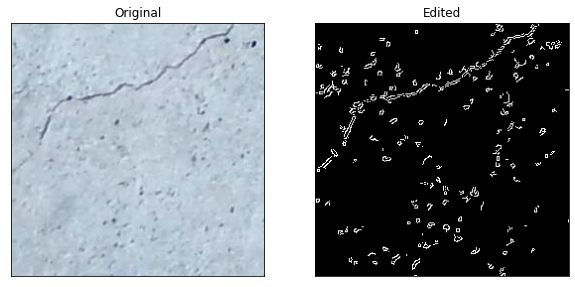

In [9]:
# results not good for this !

IMAGEPOINT+=1
# Resize the image using the cv2.resize() method and linear interpolation
import cv2
import numpy as np
height = SIZE
width = SIZE
#IMAGEPOINT=99

#for i in range(200):
print(IMAGEPOINT)
original_image_array1 = X[IMAGEPOINT] ### FILL IN ###
original_image_array = cv2.cvtColor(original_image_array1, cv2.COLOR_BGR2GRAY)

edited_image = cv2.resize(original_image_array, (width,height),interpolation=cv2.INTER_LINEAR)

t_lower = 127 # Lower Threshold
t_upper = 250 # Upper threshold
edited_image=(edited_image*255).astype(np.uint8) 
edited_image = cv2.Canny(edited_image, t_lower, t_upper)
#plt.figure(figsize=(10,20))



#plt.imshow(dd, cmap="gray") 
display_two(original_image_array1, edited_image, title1 = "Original", title2 = "Edited", isGray=True)

#cv2.imwrite('res.png', res)
#plt.figure(figsize=(10,10))
#plt.imshow(original_image_array1)


In [10]:
IMAGEPOINT = 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3
@@### 61.8 618 [618, 142, 85, 74, 67, 54, 45, 44, 34, 34, 30, 29, 29, 25, 22, 22, 21, 19, 19, 18, 18, 18, 18, 17, 16, 16, 16, 16, 15, 15, 15, 14, 14, 14, 14, 14, 13, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

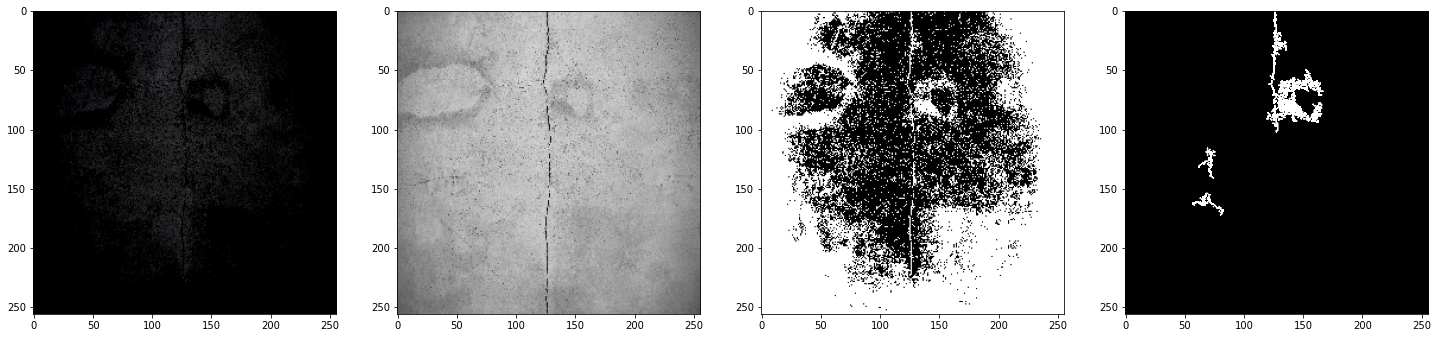

In [12]:
#Best result uptonow

IMAGEPOINT+=1

print(IMAGEPOINT)

original_image_array1 = X[IMAGEPOINT] ### FILL IN ###

img =  cv2.cvtColor(original_image_array1, cv2.COLOR_BGR2GRAY)

ret,imgshow1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY)

plt.figure(figsize=(25,25))

plt.subplot(1,4,1),plt.imshow(original_image_array1,'gray',vmin=0,vmax=255)
#plt.subplot(1,4,2),plt.imshow(img,'gray',vmin=0,vmax=255)



##############################
#We can additionally convert it to grayscale
#img_GRAYSCALE =  cv2.cvtColor(original_image_array1, cv2.COLOR_BGR2GRAY)
#img=img_GRAYSCALE

#img=original_image
#ret,imgshow1 = cv.threshold(img,0,255,cv2.THRESH_BINARY_INV)

########################################################
#removing small components
import cv2
import numpy as np

plt.subplot(1,4,2),plt.imshow(img,'gray')
#img = img.astype("uint8")


ret, blackAndWhite = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV)
plt.subplot(1,4,3),plt.imshow(blackAndWhite,cmap='gray')


img2 = blackAndWhite.astype("uint8")
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(img2, None, None, None, 8, cv2.CV_32S)
sizes = stats[1:, -1] #get CC_STAT_AREA component
img2 = np.zeros((labels.shape), np.uint8)




a=list(sizes)
a.sort(reverse=True)
#print("START A:",a)
for i in range(len(a)-1):
    if a[i] > (20 * a[i+1]):
        a[i]=0
    else:
        break
a.sort(reverse=True)



q=sum(a) / len(a)
if len(a) > 40:
    FILTERDOTLOWER = a[int(len(a)/2)]
else:
    FILTERDOTLOWER=0

#print("START A:",a)
FILTERDOTUPPER = a[0]

FILTERDOTLOWER=FILTERDOTUPPER/10
print("@@###",FILTERDOTLOWER,FILTERDOTUPPER,a)
for i in range(0, nlabels - 1):
    if sizes[i] >= FILTERDOTLOWER and sizes[i] <= FILTERDOTUPPER:   #filter small dotted regions
        #print(sizes[i])
        img2[labels == i + 1] = 255
        
#print("@@@",FILTERDOT,anz_comp,sizes,img2[1])
resimage = cv2.bitwise_not(img2)
ret, resimage = cv2.threshold(resimage, 127, 255, cv2.THRESH_BINARY_INV)

plt.subplot(1,4,4),plt.imshow(resimage,'gray',vmin=0,vmax=55)
 
 
 
 
plt.show()



In [ ]:
z=list(sizes) 
z.sort(reverse=True)
z

In [ ]:
blackAndWhite

In [13]:
IMAGEPOINT-=1
print(IMAGEPOINT)

2


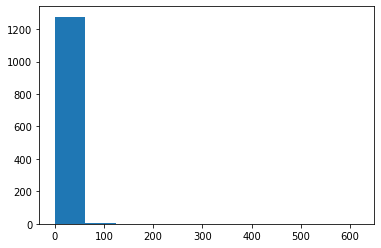

[618, 142, 85, 74, 67, 54, 45, 44, 34, 34, 30, 29, 29, 25, 22, 22, 21, 19, 19, 18, 18, 18, 18, 17, 16, 16, 16, 16, 15, 15, 15, 14, 14, 14, 14, 14, 13, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [14]:
plt.hist(a)
plt.show()
print(a)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


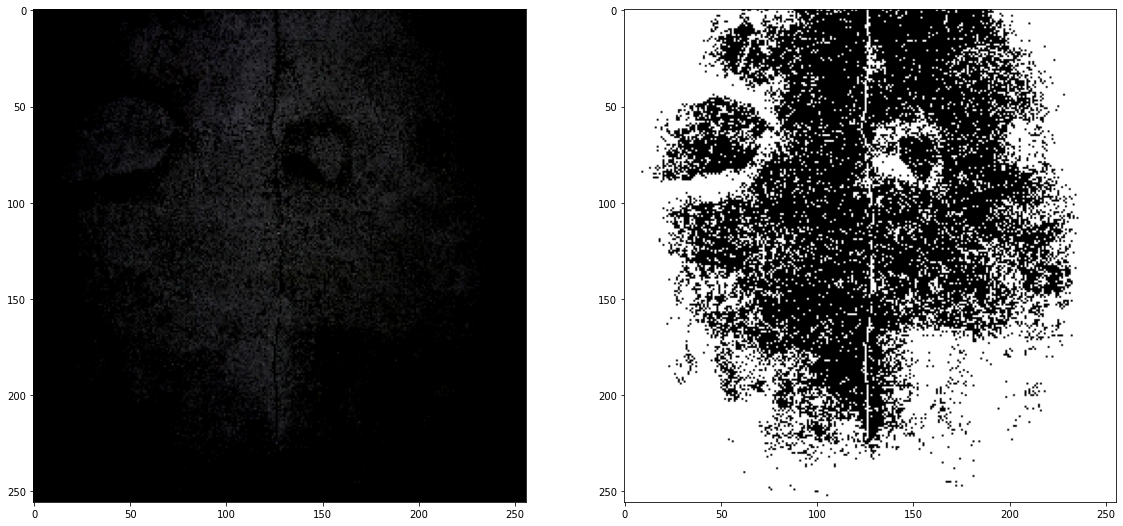

In [19]:
 
#We can additionally convert it to grayscale
img_GRAYSCALE =  cv2.cvtColor(original_image_array1, cv2.COLOR_BGR2GRAY)
img=img_GRAYSCALE

#img=original_image
ret,imgshow1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV)
#ret,imgshow2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
#ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
#ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
#ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
#titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
#images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(30,30))


kernel = np.ones((3,3), np.uint8)
#imgshow1 = cv2.erode(imgshow1, kernel, iterations=2)
#img = cv2.dilate(img, kernel, iterations=1)
#ret,imgshow1 = cv.threshold(imgshow1,0,128,cv.THRESH_BINARY_INV) 

plt.subplot(1,3,1),plt.imshow(original_image_array1)
plt.subplot(1,3,2),plt.imshow(imgshow1,'gray')
plt.show()

In [21]:
original_image_array1.shape
 

(256, 256, 3)

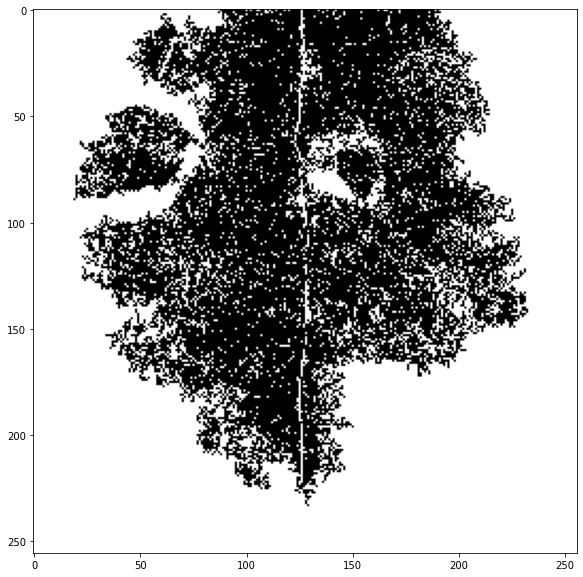

In [22]:
#removing small components
import cv2
import numpy as np

src = imgshow1
img = src.astype("uint8")
_, blackAndWhite = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)


nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(blackAndWhite, None, None, None, 8, cv2.CV_32S)
sizes = stats[1:, -1] #get CC_STAT_AREA component
img2 = np.zeros((labels.shape), np.uint8)

for i in range(0, nlabels - 1):
    if sizes[i] >= 800:   #filter small dotted regions
        img2[labels == i + 1] = 255

res = cv2.bitwise_not(img2)

#cv2.imwrite('res.png', res)
plt.figure(figsize=(10,10))
plt.imshow(res,'gray')

In [ ]:
 imgshow1.shape

In [23]:
# Import the cv2 library
import cv2
# Read the image you want connected components of
#img=original_image_array1
#a, b, c = cv2.split(img)
src = imgshow1
src = src.astype("uint8")
# Threshold it so it becomes binary
 
ret, thresh = cv2.threshold(src,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# You need to choose 4 or 8 for connectivity type
connectivity = 4  
# Perform the operation
output = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
# Get the results
# The first cell is the number of labels
num_labels = output[0]
# The second cell is the label matrix
labels = output[1]
# The third cell is the stat matrix
stats = output[2]
# The fourth cell is the centroid matrix
centroids = output[3]
print(labels)


[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [ ]:
a

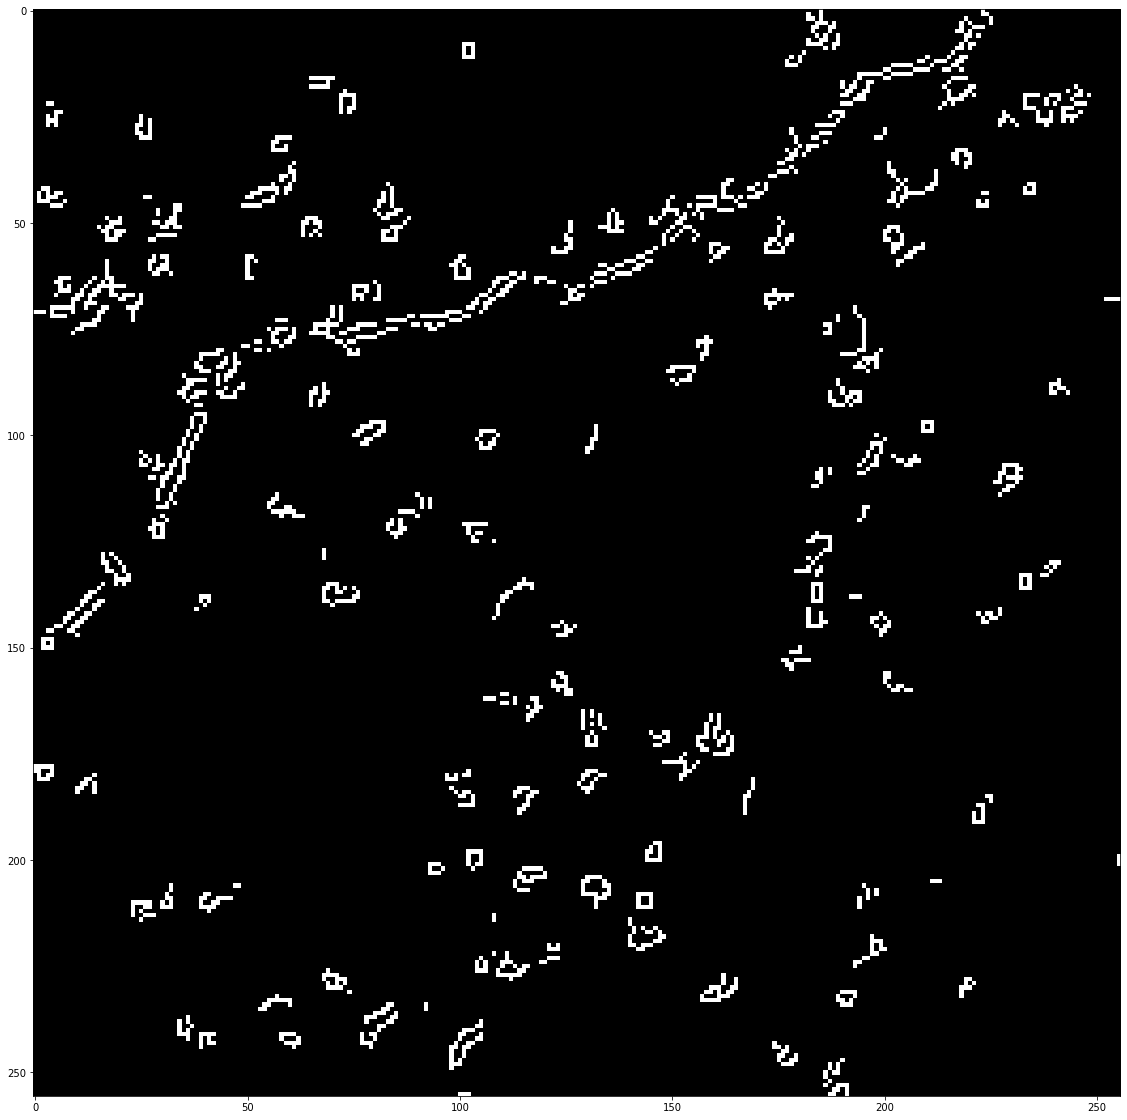

In [24]:
#input()
#break

#Test erosion/dilation
import cv2
import numpy as np

# Reading the input image
img = edited_image
 
kernel = np.ones((2,2), np.uint8)
#img = cv2.erode(img, kernel, iterations=1)
#img = cv2.dilate(img, kernel, iterations=1)
imgshow=img
 


#cv2.imshow('origin', img)
#cv2.imshow('img_erode', img_erode)
#cv2.imshow('img_dilate', img_dilate)
#cv2.imshow('img_erode2', img_erode2)

plt.figure(figsize=(20,20))
plt.imshow(imgshow,'gray')
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [25]:
#test own filter
 
original_image_array1 = X[IMAGEPOINT] ### FILL IN ###
#original_image_array = cv2.cvtColor(original_image_array1, cv2.COLOR_BGR2GRAY)
#edited_image = cv2.resize(original_image_array, (width,height),interpolation=cv2.INTER_LINEAR)
imgo=original_image_array1.copy()
imgo=(imgo*255).astype(np.uint8)

def lijnx(y,img_array):
    shp=img_array.shape
    z=shp[2]
    #y=shp[1]
    x=shp[0]
    for px in range(0,x):
        img_array[y][px][0]=np.uint8(255) 
        img_array[y][px][1]=np.uint8(255) 
        img_array[y][px][2]=np.uint8(255) 
    return img_array

def filter1(img_array,depth):
    shp=img_array.shape
    z=shp[2]
    y=shp[1]
    x=shp[0]
    #print(x,y,z)
    for py in range(y):
        for px in range(x):
            if (img_array[py][px][0] > depth) or (img_array[py][px][1] > depth) or (img_array[py][px][2] > depth) :
                img_array[py][px][0]=255
                img_array[py][px][1]=255
                img_array[py][px][2]=255
    return img_array

'''
#img = lijnx(2,imgo)
for depth in range(0,200,10):
    imgo=original_image_array1.copy()
    imgo=(imgo*255).astype(np.uint8) 

    img = filter1(imgo,depth)

 

    img=image.array_to_img(imgo)

    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap="gray")

'''   



'\n#img = lijnx(2,imgo)\nfor depth in range(0,200,10):\n    imgo=original_image_array1.copy()\n    imgo=(imgo*255).astype(np.uint8) \n\n    img = filter1(imgo,depth)\n\n \n\n    img=image.array_to_img(imgo)\n\n    plt.figure(figsize=(10,10))\n    plt.imshow(img, cmap="gray")\n\n'

In [26]:
print(imgo)

[[[ 59  79  97]
  [ 49  69  87]
  [ 49  69  87]
  ...
  [ 43  63  81]
  [ 45  65  83]
  [ 47  67  85]]

 [[ 63  83 101]
  [ 53  73  91]
  [ 51  71  89]
  ...
  [ 39  59  77]
  [ 41  61  79]
  [ 45  65  83]]

 [[ 63  83 101]
  [ 55  75  93]
  [ 51  71  89]
  ...
  [ 41  61  79]
  [ 45  65  83]
  [ 49  69  87]]

 ...

 [[ 39  59  77]
  [ 41  61  79]
  [ 43  63  81]
  ...
  [ 51  77  93]
  [ 43  69  85]
  [ 37  63  79]]

 [[ 45  65  83]
  [ 45  65  83]
  [ 45  65  83]
  ...
  [ 45  71  87]
  [ 35  61  77]
  [ 27  53  69]]

 [[ 49  69  87]
  [ 47  67  85]
  [ 45  65  83]
  ...
  [ 41  67  83]
  [ 29  55  71]
  [ 19  45  61]]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


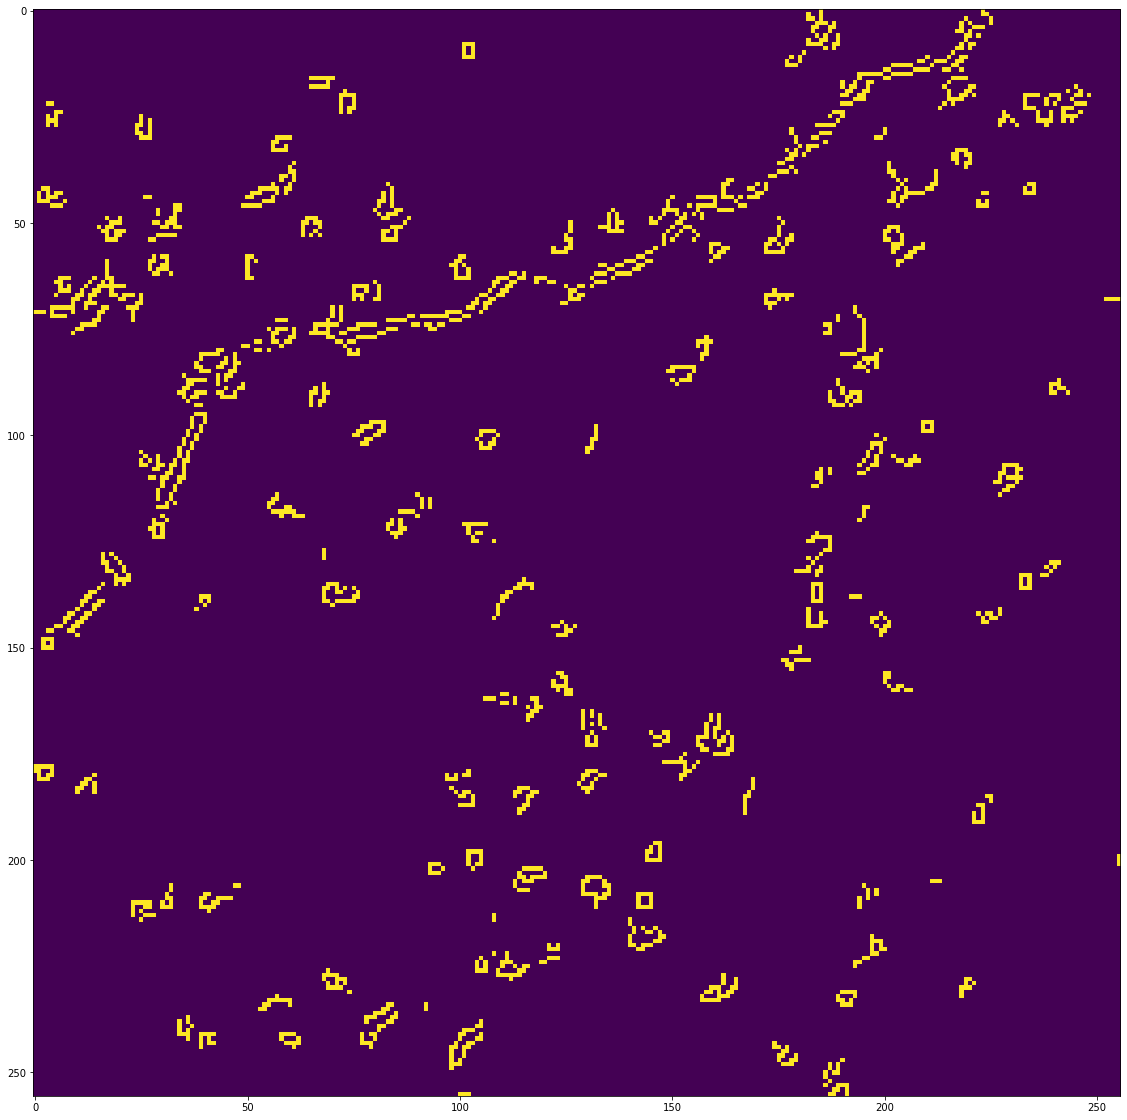

In [27]:

def unsharp_mask(image, kernel_size=(1, 1), sigma=1.0, amount=1.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask.
    
    Taken from https://stackoverflow.com/a/55590133
    """
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

edited_image = unsharp_mask(img, amount=5.0)
#display_two(original_image, edited_image)
plt.figure(figsize=(20,20))
plt.imshow(edited_image)
print(edited_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


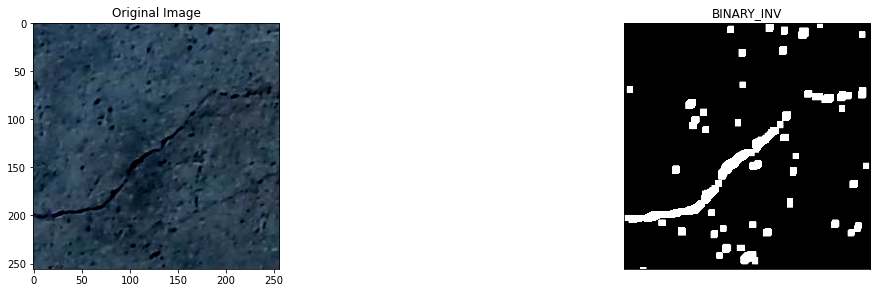

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(256, 256, 3)

In [28]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#IMAGEPOINT=7
original_image = X[IMAGEPOINT-1] ### FILL IN ###
# WARNING: openCV works with the BGR(blue, green, red) color map, whereas pyplot works with RGB

#img=original_image
#We can additionally convert it to grayscale
img_GRAYSCALE =  cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
img=img_GRAYSCALE

#img=original_image
ret,thresh1 = cv.threshold(img,0,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,0,255,cv.THRESH_BINARY_INV)

img = thresh2
kernel = np.ones((2,2), np.uint8)
thresh2 = cv2.dilate(img, kernel, iterations=5)


#ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
#ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
#ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
#images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(15,15))
'''
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
'''
plt.subplot(2,3,1),plt.imshow(original_image,'gray',vmin=0,vmax=255)
plt.title(titles[0])
#plt.subplot(2,3,2),plt.imshow(thresh1,'gray',vmin=0,vmax=255)
#plt.title(titles[1])
plt.subplot(2,3,3),plt.imshow(thresh2,'gray',vmin=0,vmax=55)
plt.title(titles[2])
plt.xticks([]),plt.yticks([])
plt.show()
print(thresh2)
original_image.shape

In [29]:
#Best result uptonow Function
def cleanup_img2(image_array):
    #original_image_array = X[IMAGEPOINT] ### FILL IN ###
    original_image_array = image_array

    img =  cv2.cvtColor(original_image_array, cv2.COLOR_BGR2GRAY)

    ret,imgshow1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY)

    #removing small components


    ret, blackAndWhite = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV)

    img2 = blackAndWhite.astype("uint8")
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(img2, None, None, None, 8, cv2.CV_32S)
    sizes = stats[1:, -1] #get CC_STAT_AREA component
    img2 = np.zeros((labels.shape), np.uint8)

    a=list(sizes)
    if a == []:
        return img
    a.sort(reverse=True)
    #print("START A:",a,len(image_array))
    for i in range(len(a)-1):
        if a[i] > (20 * a[i+1]):
            a[i]=0
        else:
            break
    a.sort(reverse=True)

    #q=sum(a) / len(a)
    if len(a) > 40:
        FILTERDOTLOWER = a[int(len(a)/2)]
    else:
        FILTERDOTLOWER=0

    FILTERDOTUPPER = a[0]

    FILTERDOTLOWER=FILTERDOTUPPER/10

    for i in range(0, nlabels - 1):
        if sizes[i] >= FILTERDOTLOWER and sizes[i] <= FILTERDOTUPPER:   #filter small dotted regions
            img2[labels == i + 1] = 255
            
    resimage = cv2.bitwise_not(img2)
    ret, resimage = cv2.threshold(resimage, 127, 255, cv2.THRESH_BINARY_INV)

    return (resimage)

In [30]:
#Best result uptonow Function
def cleanup_img3(image_array):
    #original_image_array = X[IMAGEPOINT] ### FILL IN ###
    original_image_array = image_array

    img =  cv2.cvtColor(original_image_array, cv2.COLOR_BGR2GRAY)

    #ret,imgshow1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY)

    #removing small components


    ret, blackAndWhite = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV)

    #dilate
    kernel = np.ones((2,2), np.uint8)
    blackAndWhite = cv2.dilate(blackAndWhite, kernel, iterations=3)


    #decompose
    img2 = blackAndWhite.astype("uint8")
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(img2, None, None, None, 8, cv2.CV_32S)
    sizes = stats[1:, -1] #get CC_STAT_AREA component
    img2 = np.zeros((labels.shape), np.uint8)


    a=list(sizes)

    if a == []:
        return img
        
    #print(a)
    a.sort(reverse=True)
    #print("START A:",a)
    
    for i in range(len(a)-1):
        if a[i] > (20 * a[i+1]):
            a[i]=0
        else:
            break
    
    a.sort(reverse=True)

    #q=sum(a) / len(a)
    #if len(a) > 40:
    #    FILTERDOTLOWER = a[int(len(a)/2)]
    #else:
    #    FILTERDOTLOWER=0


    FILTERDOTUPPER = a[0]

    FILTERDOTLOWER=FILTERDOTUPPER/5

    for i in range(0, nlabels - 1):
        if sizes[i] >= FILTERDOTLOWER and sizes[i] <= FILTERDOTUPPER:   #filter small dotted regions
            img2[labels == i + 1] = 255
            
    resimage = cv2.bitwise_not(img2)
    ret, resimage = cv2.threshold(resimage, 127, 255, cv2.THRESH_BINARY_INV)

    kernel = np.ones((2,2), np.uint8)
    resimage = cv2.dilate(resimage, kernel, iterations=3)
    resimage = cv2.erode(resimage, kernel, iterations=3)



    return (resimage)



In [341]:

### DO CLEANING
XNEW=[]
for image_array in X:
    #print(image_array)
    
    clean_image=cleanup_img3(image_array)
    XNEW.append(clean_image/255)
XNEW = np.array(XNEW)
imgcnt=0

In [367]:
# FOR DEMO PRESENTATION

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
#X.shape,XNEW.shape, X[10].shape , XNEW[10].shape
#XNEW[10][0:2].shape, X[10][0:2].shape
imgcnt+=1
#row=0

ONE=np.ones((256,256))
ONE3=np.ones((256,256,3))
Z = XNEW[imgcnt,:,:]
REVERSE=ONE - Z
#REVERSE=Z
ONE3[:,:,0]=REVERSE
ONE3[:,:,1]=REVERSE
ONE3[:,:,2]=REVERSE
XIM=ONE3 * X[imgcnt]

#depth=0
#print(ONE.shape,X[img,:,:,depth].shape , XNEW[img,:,:].shape)

#XNEW[img,row,:] , X[img,row,:,depth]

ONE3[0], REVERSE[0]
XIM[0]
print(imgcnt)
plt.figure(figsize=(25,25))
plt.subplot(1,3,1),plt.imshow(X[imgcnt])
plt.subplot(1,3,2),plt.imshow(ONE3)
plt.subplot(1,3,3),plt.imshow(XIM)
plt.show()




IndexError: index 26 is out of bounds for axis 0 with size 26

In [60]:
#########################
####
#### START MODELLING
####
#########################
'''
### DO CLEANING
XNEW=[]
for image_array in X:
    #print(image_array)

    clean_image=cleanup_img2(image_array)
    XNEW.append(clean_image/255)
XNEW = np.array(XNEW)
'''
######################
XRES=[]
for image_array in X:
    clean_image=cleanup_img2(image_array)
    XNEW = clean_image/255

    ONE=np.ones((256,256))
    ONE3=np.ones((256,256,3))
    Z = XNEW
    REVERSE=ONE - Z
    ONE3[:,:,0]=REVERSE
    ONE3[:,:,1]=REVERSE
    ONE3[:,:,2]=REVERSE
    XIM=ONE3 * X[imgcnt]
    XIM=cv2.resize(XIM, (244,244),interpolation=cv2.INTER_LINEAR)
    XRES.append(XIM)
XRES = np.array(XRES)



##########################


### TRAIN MODEL

from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(
    XRES, 
    y,
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, 
    y_train_val,
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

In [294]:
#X = np.expand_dims(X, axis=3)

XRES.shape,X_train.shape,X_val.shape,y_train.shape,y_val.shape

((7002, 244, 244, 3),
 (4480, 244, 244, 3),
 (1121, 244, 244, 3),
 (4480, 2),
 (1121, 2))

In [295]:
from keras.preprocessing.image import ImageDataGenerator

# Determine the number of generated samples you want per original sample.
datagen_batch_size = 16

# Make a datagenerator object using ImageDataGenerator.
train_datagen = ImageDataGenerator(rotation_range=60,
                                    horizontal_flip=True)

# Feed the generator your train data.
train_generator = train_datagen.flow(X_train, y_train, batch_size=datagen_batch_size)

# Make a datagenerator object using ImageDataGenerator.
validation_datagen = ImageDataGenerator(rotation_range=60,
                                        horizontal_flip=True)

# Feed the generator your validation data.
validation_generator = validation_datagen.flow(X_val, y_val, batch_size=datagen_batch_size)

In [298]:
X_train.shape, y_train.shape

((4480, 244, 244, 3), (4480, 2))

In [299]:
# Import your chosen model!
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

# Make a model object. 
# Make sure you exclude the top part. set the input shape of the model to 224x224 pixels, with 3 color channels.
#model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze the imported layers so they cannot be retrained.
for layer in model.layers:
    layer.trainable = False
    
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [300]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

new_model = Sequential()
new_model.add(model)
new_model.add(Flatten())
new_model.add(Dense(64, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(2, activation='sigmoid'))

# Summarize.
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                4014144   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 6,272,258
Trainable params: 4,014,274
Non-trainable params: 2,257,984
____________________________________

In [301]:
# Compile and fit the model. Use the Adam optimizer and crossentropical loss. 
# Use the validation data argument during fitting to include your validation data.
#new_model.compile(optimizer='adam',
#                  loss='binary_crossentropy',
#                  metrics=['accuracy'])
import tensorflow as tf

new_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])



In [302]:
history = new_model.fit(train_generator,
                        epochs=10,   #10
                        batch_size=8,  #8
                        validation_data=validation_generator
                       )
new_model.save('../pybin/models/activemodel9999')

Epoch 1/10
280/280 [==============================] - 175s 615ms/step - loss: 0.9266 - binary_accuracy: 0.5805 - false_negatives_2: 1716.0000 - val_loss: 0.5607 - val_binary_accuracy: 0.7226 - val_false_negatives_2: 311.0000
Epoch 2/10
280/280 [==============================] - 187s 669ms/step - loss: 0.6087 - binary_accuracy: 0.6254 - false_negatives_2: 1678.0000 - val_loss: 0.5678 - val_binary_accuracy: 0.7489 - val_false_negatives_2: 283.0000
Epoch 3/10
280/280 [==============================] - 207s 739ms/step - loss: 0.5975 - binary_accuracy: 0.6165 - false_negatives_2: 1719.0000 - val_loss: 0.5822 - val_binary_accuracy: 0.6503 - val_false_negatives_2: 393.0000
Epoch 4/10
280/280 [==============================] - 208s 742ms/step - loss: 0.6062 - binary_accuracy: 0.6124 - false_negatives_2: 1855.0000 - val_loss: 0.5266 - val_binary_accuracy: 0.7663 - val_false_negatives_2: 262.0000
Epoch 5/10
280/280 [==============================] - 208s 743ms/step - loss: 0.5872 - binary_accura

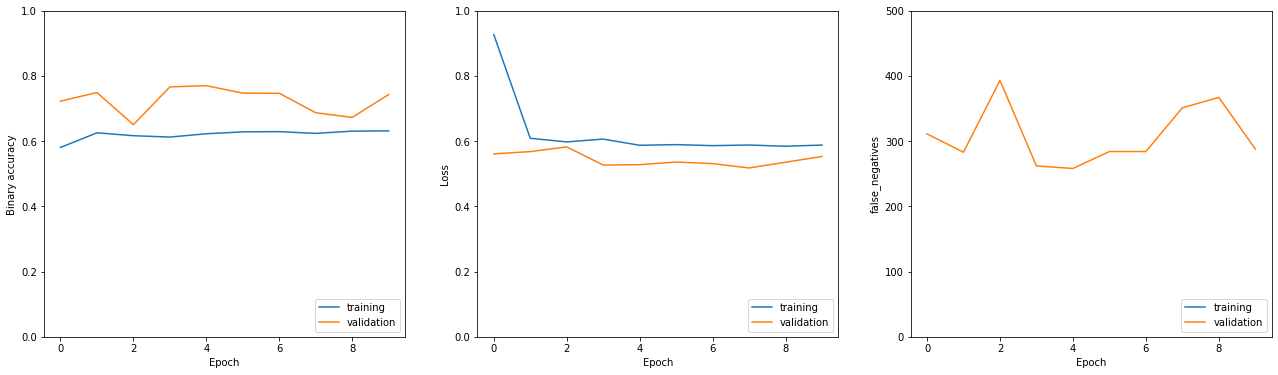

In [358]:
from matplotlib import pyplot as plt
import tensorflow

def plot_history(history : tensorflow.keras.callbacks.History):
    """ This helper function takes the tensorflow.python.keras.callbacks.History
    that is output from your `fit` method to plot the loss and accuracy of
    the training and validation set.
    """
    fig, axs = plt.subplots(1,3, figsize=(22,6))
    axs[0].plot(history.history['binary_accuracy'], label='training')
    axs[0].plot(history.history['val_binary_accuracy'], label='validation')
    axs[0].set(xlabel = 'Epoch', ylabel='Binary accuracy', ylim=[0, 1])
    axs[0].legend(loc='lower right')

    axs[1].plot(history.history['loss'], label='training')
    axs[1].plot(history.history['val_loss'], label = 'validation')
    axs[1].set(xlabel = 'Epoch', ylabel='Loss', ylim=[0, 1])
    axs[1].legend(loc='lower right')

    axs[2].plot(history.history['false_negatives_2'], label = 'training')
    axs[2].plot(history.history['val_false_negatives_2'], label = 'validation')
    axs[2].set(xlabel = 'Epoch', ylabel='false_negatives', ylim=[0, 500])
    axs[2].legend(loc='lower right')


    
plot_history(history)

In [313]:
Z=98

1/1 [==============================] - 0s 63ms/step
[[0.6264638  0.37347338]]
#### >>>> CRACK


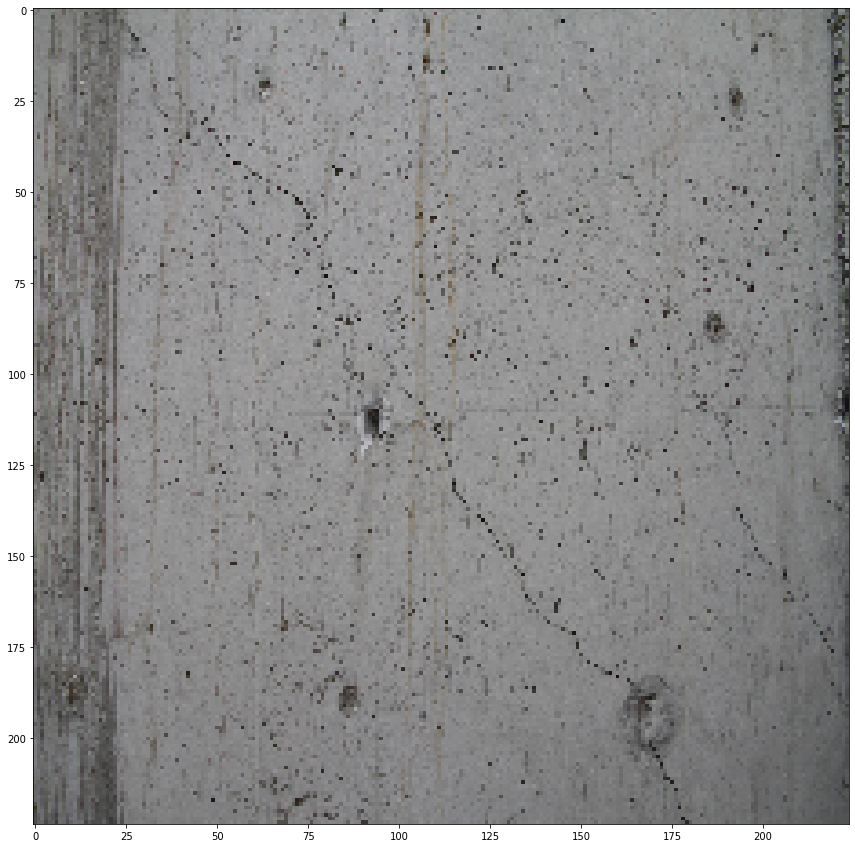

In [356]:

Z-=1
if Z == 1:
    Z=98

# Load your image. Make sure it is loaded in with the right dimensions for your model!
#image_size = (224, 224)
#original_image = image.load_img("C:/Users/bmadmin/Desktop/Octocat/mohammedbouazzaoui/concrete_inspection/project/data/AAAA.jpg", target_size=image_size)

with open('C:/Users/bmadmin/Desktop/Octocat/mohammedbouazzaoui/concrete_inspection_dataset/BACKUP_DATA/Chundata/filelist.txt', 'rt') as f:
    for i in range(Z):
        file=f.readline()
        #print(file)
file=file.strip('\n')

original_image = image.load_img(file, target_size=image_size)

# Convert your image pixels to a numpy array of values .
image_array = image.img_to_array(original_image)

# Reshape your image dimensions so that the colour channels correspond to what your model expects.
image_array = image_array.reshape((1, image_array.shape[0], image_array.shape[1], image_array.shape[2]))

# Preprocess your image with preprocess_input.
prepared_image = preprocess_input(image_array)

# Predict the class of your picture.
prediction = new_model.predict(prepared_image)

# Print out your result.
print(prediction)
if prediction[0][0] > prediction[0][1]:
    print("#### >>>> CRACK")
else:
    print("#### >>>> NOCRACK")
# Show handsome rick.
plt.figure(figsize=(15,15))

plt.imshow(original_image)
#plt.show()

In [ ]:
###########
###
###  END
###
#######################################

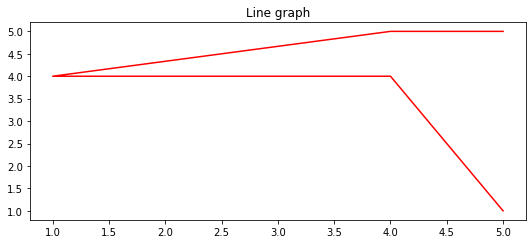

In [26]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

histo=np.load('C:/Users/bmadmin/Desktop/Octocat/mohammedbouazzaoui/concrete_inspection/project/static/history.npy',allow_pickle=True)
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.array([5, 4, 1, 4, 5])
y = np.sort(x)

plt.title("Line graph")
plt.plot(x, y, color="red")

plt.show()
